In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/olympic-games-2021-medals/Tokyo 2021 dataset v4.csv
/kaggle/input/olympic-games-2021-medals/Tokyo 2021 dataset v3.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/olympic-games-2021-medals/Tokyo 2021 dataset v4.csv')

In [4]:
df.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold Medal     93 non-null     int64 
 3   Silver Medal   93 non-null     int64 
 4   Bronze Medal   93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
 7   NOCCode        93 non-null     object
 8   Continent      93 non-null     object
dtypes: int64(6), object(3)
memory usage: 6.7+ KB


In [6]:
df.columns


Index(['Rank', 'Team/NOC', 'Gold Medal', 'Silver Medal', 'Bronze Medal',
       'Total', 'Rank by Total', 'NOCCode', 'Continent'],
      dtype='object')

In [7]:
rename = {
    'Team/NOC': 'Team',
    'Gold Medal': 'Gold',
    'Silver Medal': 'Silver',
    'Bronze Medal': 'Bronze',
}
df = df.rename(columns = rename)

In [8]:
# Top 10 with gold
top10_gold = df.groupby('Team')['Gold'].sum().sort_values(ascending= False).head(10)

# Top 10 with Silver
top10_silver = df.groupby('Team')['Silver'].sum().sort_values(ascending= False).head(10)

# Top 10 with Bronze
top10_bronze = df.groupby('Team')['Bronze'].sum().sort_values(ascending = False).head(10)

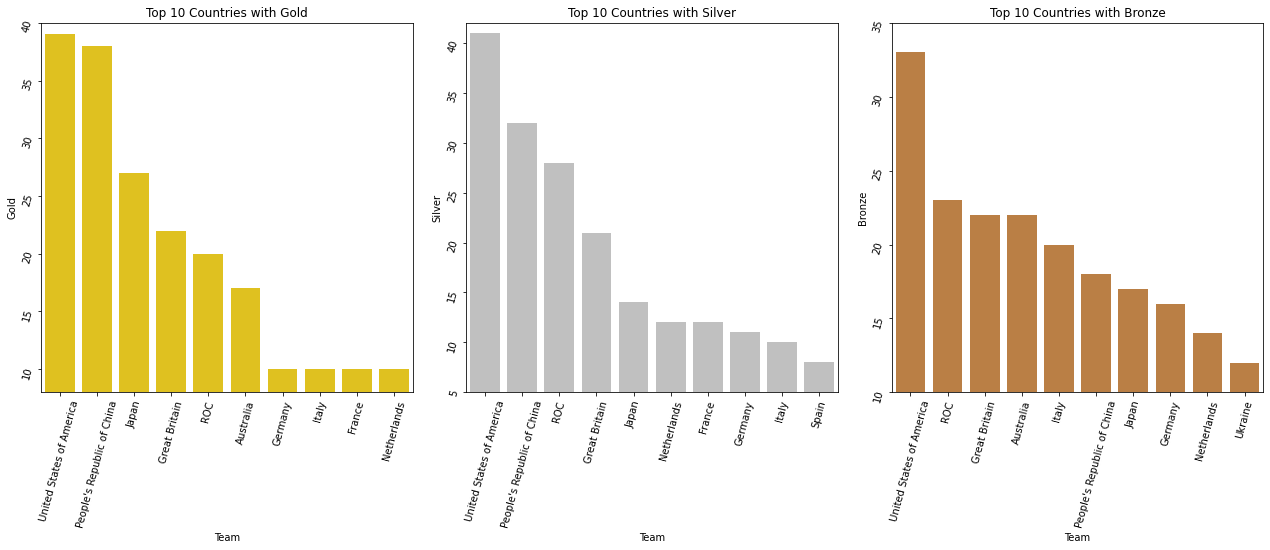

In [9]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (18,8))


ax1.set_title('Top 10 Countries with Gold')
ax1.tick_params(labelrotation = 75)
ax1.set_ylim(8,40)
sns.barplot(x = top10_gold.index, y = top10_gold, ax = ax1, color = '#ffd700');

ax2.set_title('Top 10 Countries with Silver')
ax2.tick_params(labelrotation = 75)
ax2.set_ylim(5,42)
sns.barplot(x = top10_silver.index, y = top10_silver, ax = ax2, color = '#c0c0c0');

ax3.set_title('Top 10 Countries with Bronze')
ax3.tick_params(labelrotation = 75)
ax3.set_ylim(10,35)
sns.barplot(x = top10_bronze.index, y = top10_bronze, ax = ax3, color = '#cd7f32');

plt.tight_layout(pad = 2)

In [10]:
top10_total = df[['Team','Total']].sort_values('Total', ascending = False)

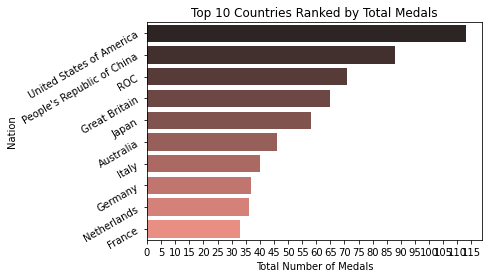

In [11]:
sns.barplot(x = top10_total['Total'] , y =top10_total['Team'].head(10), palette = 'dark:salmon')
plt.title('Top 10 Countries Ranked by Total Medals')
plt.xticks(np.arange(0,120,5))
plt.yticks(rotation = 30)
plt.xlabel('Total Number of Medals')
plt.ylabel('Nation');

In [12]:
gold_medals = df['Gold'].sum()
silver_medals = df['Silver'].sum()
bronze_medals = df['Bronze'].sum()

values = [gold_medals, silver_medals, bronze_medals]
labels= ["Gold", "Silver", "Bronze"]
colors = ['#ffd700', '#c0c0c0', '#cd7f32']
explode = (0,0,0.1)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

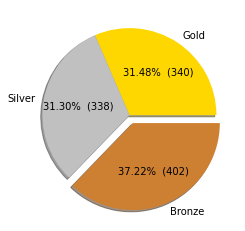

In [13]:
plt.pie(
    values, 
    labels = labels, 
    autopct=make_autopct(values), 
    shadow = True, 
    colors = colors, 
    explode = explode,
);

In [14]:
cont = df.groupby('Continent')[['Gold','Silver','Bronze','Total']].sum().head(10)
cont = cont.sort_values('Total', ascending = False)

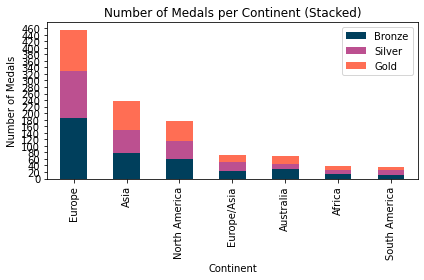

In [15]:
cont[['Bronze', 'Silver','Gold']].plot(kind = 'bar', stacked = True, color = ['#003f5c', '#bc5090', '#ff6e54'])
plt.yticks(np.arange(0, 470, 20))
plt.legend(['Bronze', 'Silver', 'Gold'])
plt.title('Number of Medals per Continent (Stacked)')
plt.ylabel('Number of Medals')
plt.tight_layout();

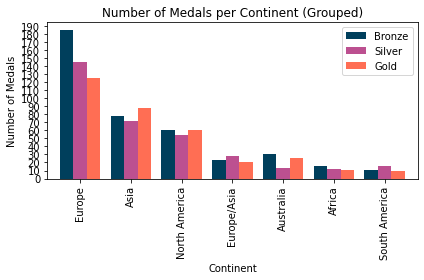

In [16]:
width = 0.8
cont[['Bronze', 'Silver','Gold']].plot(width = width,kind = 'bar', stacked = False, color = ['#003f5c', '#bc5090', '#ff6e54']);
plt.yticks(np.arange(0, 200, 10))
plt.legend(['Bronze', 'Silver', 'Gold'])
plt.title('Number of Medals per Continent (Grouped)')
plt.ylabel('Number of Medals')
plt.tight_layout();

In [17]:
a = df[['Rank', 'Rank by Total', 'Team']].head(20)


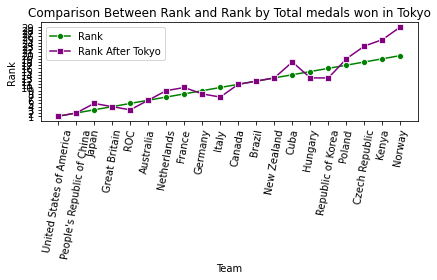

In [18]:
sns.lineplot(data = a, x = 'Team', y = 'Rank',color = 'green', marker = 'o')
sns.lineplot(data = a, x = 'Team', y = 'Rank by Total',color = 'purple', marker = 's')
plt.xticks(rotation = 80)
plt.yticks(np.arange(1,30,1))
plt.title('Comparison Between Rank and Rank by Total medals won in Tokyo')
plt.legend(['Rank', 'Rank After Tokyo']);
plt.tight_layout();